In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', input_shape=(228,228,3), include_top=False)

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

In [4]:
path = '/home/wvillegas/datasets/DHARMaBuds/corpus-26000-bc/'

In [5]:
import pandas as pd
csv_data = pd.read_csv(path+'corpus-26000.csv')

In [6]:
data = csv_data[['imageName', 'class']]

In [7]:
patch_list = []
label_list = []
for index, row in data.iterrows():
    img = cv2.imread(path + row['imageName'],cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (228,228))
    patch_list.append(img/255)
    if row['class'] == True:
        label_list.append(1)
    else:
        label_list.append(0)
    if len(patch_list) == 5000:
        break
print(str(len(patch_list)) + ' samples preprocessed')

5000 samples preprocessed


In [8]:
def shuffle_dataset(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [9]:
train = np.asarray(patch_list)
train_labels = np.asarray(label_list)

In [10]:
train.shape

(5000, 228, 228, 3)

In [11]:
shuffle_dataset(train, train_labels)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 228, 228, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 228, 228, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 228, 228, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 114, 114, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 114, 114, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 114, 114, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 57, 57, 128)       0         
__________

Let's stack some FC layers to predict binary classes

In [13]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import SGD

In [14]:
flatten = Flatten()(model.output)
fc1 = Dense(4096, activation='relu')(flatten)
fc2 = Dense(1024, activation='relu')(fc1)
final = Dense(1,activation='sigmoid')(fc2)
modelo = Model(model.input, final) 


In [15]:
optim = SGD(lr=0.01, momentum=0.9)

In [16]:
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 228, 228, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 228, 228, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 228, 228, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 114, 114, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 114, 114, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 114, 114, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 57, 57, 128)       0         
__________

In [19]:
modelo.fit(x=train, y=train_labels,epochs=15, batch_size=30)

Epoch 1/15
5000/5000 [==============================] - 262s 52ms/step - loss: 2.5343 - acc: 0.8412
Epoch 2/15
5000/5000 [==============================] - 54s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 3/15
5000/5000 [==============================] - 54s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 4/15
5000/5000 [==============================] - 54s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 5/15
5000/5000 [==============================] - 53s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 6/15
5000/5000 [==============================] - 53s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 7/15
5000/5000 [==============================] - 54s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 8/15
5000/5000 [==============================] - 53s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 9/15
5000/5000 [==============================] - 54s 11ms/step - loss: 2.5467 - acc: 0.8420
Epoch 10/15
3780/5000 [=====================>........] - ETA: 13s - loss: 2.4945 - acc: 0.8452

KeyboardInterrupt: 

Text(0.5,1,'1')

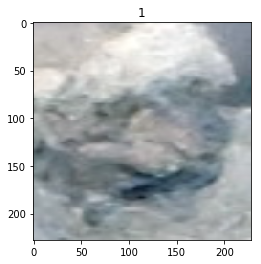

In [51]:
asd = 125
plt.imshow(train[asd,:,:,:])
plt.title(train_labels[asd])